# Laboratorio 4 

#### Javier Valle 20159

In [16]:
# Imports necesarios.
import numpy as np
import matplotlib.pyplot as plt
import linreg as l
import quad as q

# Task 1.1: Leer el archivo CSV proporcionado y almacenarlo en un np.array para ser trabajado en el notebook.


In [ ]:
# Abriendo el csv.
data = np.genfromtxt('framingham.csv', delimiter=',')

# Quitando la fila de los nan.
data = data[1:, :]

# Imprimiendo los datos.
print(data)

# Task 1.2: Ajustar un modelo logístico polinomial en base al juego de datos cargado de forma matricial que relaciona las variables independientes que usted considere apropiadas (puede no utilizar todas las componentes de X), con la variable dependiente de salida (sufre o no sufre un paro cardíaco).

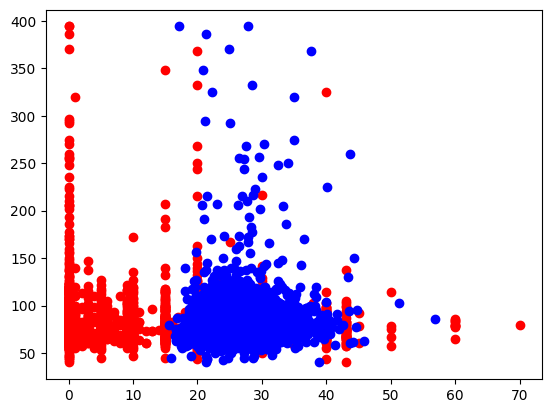

In [145]:
# Variable dependiente: sufre o no un paro cardíaco. (Posición 13). Variable independiente: BMI. (Posición 12)
# Manipulando los datos.

# Fuma o no.
X = data[:,4]

# sufrió o no un paro cardíaco.
y = data[:,14]

# Heartrate.
x = data[:,12]

# Sufrió o no un paro cardíaco.
y = data[:,14]

# Graficando si fuma vs si tuvo algún problema cardiovascular.
plt.scatter(X, y, color="red")
plt.scatter(x, y, color="blue")
plt.show()



# Task 1.3: Utilice la implementación vectorial del algoritmo de regresión logística (descenso del gradiente visto en clase)

In [ ]:
# Variable dependiente: sufre o no un paro cardíaco. (Posición 13). Variable independiente: BMI. (Posición 12)
# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00001,
    n=1000
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

ym = xmr @ tf # Pendiente de la recta a utilizar.


# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# Costo.
plt.plot(costs, color="green")
plt.show()